# Mini Project 5 - Classification with Neural Network

## Instructions on How to Run

1. Open the Jupyter Notebook.  
2. Ensure you have NumPy, Pandas, Matplotlib, scikit-learn installed.  
3. Run each cell in order from top to bottom.  
4. The notebook automatically loads the MNIST dataset via `load_digits()`.  
5. Each section prints outputs or plots relevant to the project requirements.

## Introduction

In this project, we implement a neural network to classify images of handwritten digits using the MNIST dataset. The network structure is fixed as **[64, 30, 10]** – that is, 64 input neurons (each 8×8 image flattened to a 64-dimensional vector), 30 neurons in the hidden layer, and 10 output neurons corresponding to the digit classes 0 through 9.

The neural network is built using a framework that includes:
- Forward propagation for computing the network output.
- Backward propagation for computing gradients.
- Parameter updates through gradient descent.
- Evaluation of model performance via prediction and accuracy functions.

**Key Idea:**  
A non-linear activation function is crucial to allow the network to model complex relationships. In this project, we experiment with **Sigmoid**, **ReLU**, and **Tanh** activations.

---

## Key Formulas

### 1. Activation Functions

**Sigmoid Function:**

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

**Derivative of Sigmoid:**

$$
\sigma'(x) = \sigma(x)\,(1 - \sigma(x))
$$

**ReLU Function:**

$$
\operatorname{ReLU}(x) = \max(0,\, x)
$$

**Derivative of ReLU:**

$$
\operatorname{ReLU}'(x) =
\begin{cases}
1, & \text{if } x \ge 0 \\
0, & \text{if } x < 0
\end{cases}
$$

**Tanh Function:**

$$
\tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}
$$

**Derivative of Tanh:**

$$
\frac{d}{dx}\tanh(x) = 1 - \tanh(x)^2
$$

### 2. Forward Propagation

For an input \( X \):

1. **Hidden Layer:**

$$
Z^{[1]} = XW^{[1]} + b^{[1]}
$$

$$
A^{[1]} = f(Z^{[1]})
$$

2. **Output Layer:**

$$
Z^{[2]} = A^{[1]}W^{[2]} + b^{[2]}
$$

$$
A^{[2]} = f(Z^{[2]})
$$

Here, f(_) represents any of the activation functions (sigmoid, ReLU, or tanh).

### 3. Cost Function (Mean Squared Error)

$$
J = \frac{1}{m}\sum_{i=1}^{m} \bigl( A^{[2]}_i - y_i \bigr)^2
$$

### 4. Backward Propagation

**For the Output Layer:**

$$
\frac{\partial J}{\partial Z^{[2]}} = 2\,(A^{[2]} - y) \odot f'\bigl(Z^{[2]}\bigr)
$$

$$
\frac{\partial J}{\partial W^{[2]}} = \frac{1}{m}\,(A^{[1]})^T \frac{\partial J}{\partial Z^{[2]}}
$$

$$
\frac{\partial J}{\partial b^{[2]}} = \frac{1}{m}\sum_{i=1}^{m} \frac{\partial J}{\partial Z_i^{[2]}}
$$

**For the Hidden Layer:**

$$
\frac{\partial J}{\partial Z^{[1]}} = \left( \frac{\partial J}{\partial Z^{[2]}}W^{[2]T} \right) \odot f'\bigl(Z^{[1]}\bigr)
$$

$$
\frac{\partial J}{\partial W^{[1]}} = \frac{1}{m}\,X^T \frac{\partial J}{\partial Z^{[1]}}
$$

$$
\frac{\partial J}{\partial b^{[1]}} = \frac{1}{m}\sum_{i=1}^{m} \frac{\partial J}{\partial Z_i^{[1]}}
$$

Here, $$\odot$$ , denotes element-wise multiplication.

---

## Importing the Necessary Libraries and the Dataset

In [1]:
from sklearn.datasets import load_digits #import the dataset
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
np.random.seed(42)

## Data Loading & Visualization:

In [2]:
digits = load_digits()

<Figure size 640x480 with 0 Axes>

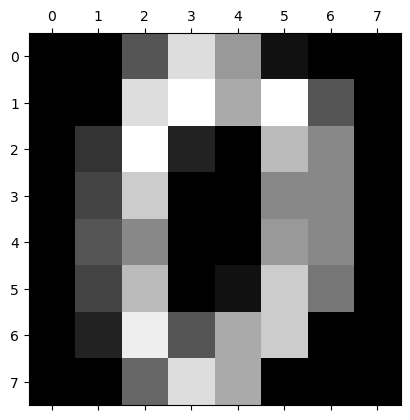

In [3]:
plt.gray()
plt.matshow(digits.images[0])
plt.show() # The printed figure shows the first 8x8 digit image

In [4]:
# Print the shapes of images and data
print("Shape of images:", digits.images.shape)  
print("Shape of data:", digits.data.shape)       

Shape of images: (1797, 8, 8)
Shape of data: (1797, 64)


## Data Preprocessing

**Scaling the Inputs:**  
- Normalize the 64-dimensional input vectors.

**One-Hot Encoding the Targets:**  
- Create a one-hot encoded matrix for the 10 digit classes.

**Train-Test Split:**  
- Use an 80% / 20% train-test split.


In [5]:
# Initialize the scaler
scaler = StandardScaler()

In [6]:
# Use the flattened data as inputs and the original labels as targets
inputs = digits.data
targets = digits.target

In [7]:
# Scale the input features
inputs = scaler.fit_transform(inputs) 

In [8]:
# One-hot encode the targets by creating a new array
onehot_targets = np.zeros((targets.shape[0], 10))

for i in range(targets.shape[0]):
    onehot_targets[i, targets[i]] = 1


In [9]:
onehot_targets

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [10]:
# Split the dataset into training and testing sets (80% train, 20% test).
X_train, X_test, y_train, y_test = train_test_split(inputs, onehot_targets, test_size = 0.2, random_state = 42)

## Neural Network Implementation

In [11]:
class NeuralNetwork:
    def __init__(self, input_size = 64, hidden_size = 30, output_size = 10, learning_rate = 0.01, epochs = 1000):
        # Hyperparameters
        self.learning_rate = learning_rate
        self.epochs = epochs
        
        # Weights & bias initialization with small random values
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01  
        self.b1 = np.zeros((1, hidden_size))                       
        self.W2 = np.random.randn(hidden_size, output_size) * 0.01 
        self.b2 = np.zeros((1, output_size))                       #

    # Sigmoid activation function
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    # Derivative of the sigmoid function
    def sigmoid_deriv(self, x):
        return self.sigmoid(x) * (1 - self.sigmoid(x))

    # ReLU activation function
    def ReLU(self, x):
        return np.maximum(0, x)

    # Derivative of the ReLU function
    def ReLU_deriv(self, x):
        return np.where(x > 0, 1, 0)

    # Tanh activation function
    def tanh(self, x):
        return np.tanh(x)

    # Derivative of the tanh function
    def tanh_deriv(self, x):
        return 1 - (self.tanh(x))**2

    # Forward propagation: computes the activations for the hidden and output layers
    def forward_propagation(self, x, activation):
        # Hidden layer
        z1 = x @ self.W1 + self.b1
        a1 = activation(z1)
    
        # Output layer
        z2 = a1 @ self.W2 + self.b2
        a2 = activation(z2)
    
        return z1, a1, z2, a2

    # Compute the cost using Mean Squared Error
    def compute_cost(self, y_pred, y_true):
        cost = np.mean((y_pred - y_true) ** 2)
        return cost

    # Back propagation: computes gradients for updating weights and biases
    def back_propagation(self, x, y, activation, activation_derivative):       
        m = y.shape[0]
        
        z1, a1, z2, a2 = self.forward_propagation(x, activation)

        # Compute error at output layer
        error2 = 2 * (a2 - y) * activation_derivative(z2)

        # Compute gradients for weights and biases for the output layer
        grad_W2 = (a1.T @ error2) / m
        grad_b2 = np.sum(error2, axis = 0, keepdims = True) / m

        # Backpropagate the error to the hidden layer
        error1 = (error2 @ self.W2.T) * activation_derivative(z1)

        # Compute gradients for weights and biases for the hidden layer
        grad_W1 = (x.T @ error1) / m
        grad_b1 = np.sum(error1, axis = 0, keepdims = True) / m

        return grad_W1, grad_b1, grad_W2, grad_b2

    # Update the network parameters (weights and biases) using the computed gradients
    def update_parameters(self, grad_W1, grad_b1, grad_W2, grad_b2):
        self.W2 = self.W2 - (self.learning_rate * grad_W2)
        self.b2 = self.b2 - (self.learning_rate * grad_b2)
        self.W1 = self.W1 - (self.learning_rate * grad_W1)
        self.b1 = self.b1 - (self.learning_rate * grad_b1)

    # Train the neural network by iterating over epochs
    def train(self, x, y, activation, activation_derivative):
        for epoch in range(self.epochs):
            # Perform forward propagation to get outputs
            z1, a1, z2, a2 = self.forward_propagation(x, activation)

            # Compute gradients via back propagation
            grad_W1, grad_b1, grad_W2, grad_b2 = self.back_propagation(x, y, activation, activation_derivative)

            # Update network parameters with the gradients
            self.update_parameters(grad_W1, grad_b1, grad_W2, grad_b2)

            # Every 100 epochs, compute and print the cost for monitoring convergence
            if (epoch%100 == 0):
                cost = self.compute_cost(a2, y)
                print(f"Epoch {epoch}, Cost: {cost}")

    # Predict class labels for input data
    def predict(self, x, activation):
        _ , _ , _ , a2 = self.forward_propagation(x, activation)
        predictions = np.argmax(a2, axis = 1)  # Choose the index with the highest activation
        return predictions

    # Compute the accuracy score given the true and predicted labels
    def accuracy_score(self, y_true, y_pred):
        return accuracy_score(y_true, y_pred)

## Model Training and Evaluation

### Neural Network with Sigmoid Activation

In [12]:
# Neural Network with Sigmoid activation

net_sigmoid = NeuralNetwork(learning_rate = 0.01, epochs = 1000)
net_sigmoid.train(X_train, y_train, activation = net_sigmoid.sigmoid, activation_derivative = net_sigmoid.sigmoid_deriv)

y_test_labels = np.argmax(y_test, axis=1)  # Convert one-hot encoded test labels to class indices
predictions = net_sigmoid.predict(X_test, activation = net_sigmoid.sigmoid)

acc_sigmoid = net_sigmoid.accuracy_score(y_test_labels, predictions)
print("Sigmoid Test Accuracy:", acc_sigmoid)

Epoch 0, Cost: 0.2499505353562436
Epoch 100, Cost: 0.11768423959628062
Epoch 200, Cost: 0.09946498383544228
Epoch 300, Cost: 0.09436171368203497
Epoch 400, Cost: 0.09232483984670133
Epoch 500, Cost: 0.09134410261961073
Epoch 600, Cost: 0.090814695476524
Epoch 700, Cost: 0.09050613875663747
Epoch 800, Cost: 0.09031607767844214
Epoch 900, Cost: 0.09019393381835755
Sigmoid Test Accuracy: 0.07777777777777778


### Neural Network with ReLU Activation

In [13]:
# Neural Network with ReLU activation

net_ReLU = NeuralNetwork(learning_rate = 0.01, epochs = 1000)
net_ReLU.train(X_train, y_train, activation = net_ReLU.ReLU, activation_derivative = net_ReLU.ReLU_deriv)

y_test_labels = np.argmax(y_test, axis=1)  # Convert one-hot encoded test labels to class indices
predictions = net_ReLU.predict(X_test, activation = net_ReLU.ReLU)

acc_ReLU = net_ReLU.accuracy_score(y_test_labels, predictions)
print("ReLU Test Accuracy:", acc_ReLU)

Epoch 0, Cost: 0.09996909688755827
Epoch 100, Cost: 0.08889566075149792
Epoch 200, Cost: 0.08323848804252669
Epoch 300, Cost: 0.06889390613964584
Epoch 400, Cost: 0.050605501658236025
Epoch 500, Cost: 0.0371807089738276
Epoch 600, Cost: 0.029443322067238143
Epoch 700, Cost: 0.024662869884151402
Epoch 800, Cost: 0.02119527648581149
Epoch 900, Cost: 0.018593993844726348
ReLU Test Accuracy: 0.9333333333333333


### Neural Network with Tanh Activation

In [14]:
# Neural Network with tanh activation

net_tanh = NeuralNetwork(learning_rate = 0.01, epochs = 1000)
net_tanh.train(X_train, y_train, activation = net_tanh.tanh, activation_derivative = net_tanh.tanh_deriv)

y_test_labels = np.argmax(y_test, axis=1)  # Convert one-hot encoded test labels to class indices
predictions = net_tanh.predict(X_test, activation = net_tanh.tanh)

acc_tanh = net_tanh.accuracy_score(y_test_labels, predictions)
print("tanh Test Accuracy:", acc_tanh)

Epoch 0, Cost: 0.09997669382146918
Epoch 100, Cost: 0.08241535412456817
Epoch 200, Cost: 0.06724263832459602
Epoch 300, Cost: 0.057985381839983335
Epoch 400, Cost: 0.050486091075251184
Epoch 500, Cost: 0.04538922197885836
Epoch 600, Cost: 0.04231161263450493
Epoch 700, Cost: 0.04030793547949076
Epoch 800, Cost: 0.03893110865226537
Epoch 900, Cost: 0.03796323174950409
tanh Test Accuracy: 0.9388888888888889


## Observations & Findings

**(i) Sigmoid Activation:**
- The cost decreases from approximately 0.25 to 0.09, which indicates that the network is fitting the training data. However, the test accuracy remains very low at around 7.78%. It appears that the network might be predicting nearly the same class for all test examples, which is a common issue when using sigmoid activation in certain network setups due to vanishing gradients. Although the code is correct, the chosen parameters or the sigmoid activation function may not be well-suited for the architecture and dataset under the current hyperparameter settings. In the next section, we will examine whether adjusting the hyperparameters can improve the accuracy with sigmoid activation.

**(ii) ReLU Activation:**
- The cost steadily decreases from roughly 0.0999 to 0.0186, which is a positive sign of convergence. Moreover, the test accuracy is approximately 93.33%, indicating good performance.

**(iii) tanh Activation:**
- The cost decreases from around 0.0999 to 0.0379, showing smooth convergence. Additionally, the test accuracy is about 93.88%, which is very promising. It is possible that the accuracy for both ReLU and tanh could be further improved by fine-tuning the hyperparameters, a subject we will explore in the next section.


## Experimenting with Different Hyperparameters

We then perform a grid search over the following hyperparameters:

- **Learning Rates:** `[0.001, 0.005, 0.01, 0.05, 0.1]`
- **Epoch Values:** `[500, 1000, 1500, 2000, 2500]`
- **Activation Functions:** `Sigmoid`, `ReLU`, `Tanh`


In [15]:
# Define hyperparameter grids for learning rate and number of epochs to experiment with
learning_rates = [0.001, 0.005, 0.01, 0.05, 0.1]
epoch_vals = [500, 1000, 1500, 2000, 2500]
activation_names = ["sigmoid", "ReLU", "tanh"]
results = {}

# Loop over each activation function
for act_name in activation_names:
    results[act_name] = {}  # Create an entry in results for the current activation
    print(f"\n=== Experimenting with {act_name} activation ===\n")

    for lr in learning_rates:
        for ep in epoch_vals:
            net = NeuralNetwork(learning_rate=lr, epochs=ep)

            # Retrieve the activation function and its derivative based on the current activation name
            activation = getattr(net, act_name)
            activation_deriv = getattr(net, act_name + "_deriv")
            
            # Train the network using the chosen activation functions
            net.train(X_train, y_train, activation=activation, activation_derivative=activation_deriv)
            
            predictions = net.predict(X_test, activation=activation)
            y_test_labels = np.argmax(y_test, axis=1) 
            acc = net.accuracy_score(y_test_labels, predictions)

            # Store the accuracy in the results dictionary using (learning rate, epochs) tuple as the key
            results[act_name][(lr, ep)] = acc
            
            print(f"LR: {lr:<6} Epochs: {ep:<5} -> Accuracy: {acc:.4f}")
            print("\n\n")
    print("\n" + "="*50)


=== Experimenting with sigmoid activation ===

Epoch 0, Cost: 0.25072959556321894
Epoch 100, Cost: 0.22005333431261223
Epoch 200, Cost: 0.19572630360967855
Epoch 300, Cost: 0.17662598925050382
Epoch 400, Cost: 0.1616505280071743
LR: 0.001  Epochs: 500   -> Accuracy: 0.0833



Epoch 0, Cost: 0.24801756242615614
Epoch 100, Cost: 0.21789463109964927
Epoch 200, Cost: 0.19403075441934362
Epoch 300, Cost: 0.17529940429468083
Epoch 400, Cost: 0.1606101827634324
Epoch 500, Cost: 0.14903925745661736
Epoch 600, Cost: 0.13985490858447958
Epoch 700, Cost: 0.13249709451497654
Epoch 800, Cost: 0.12654384951837247
Epoch 900, Cost: 0.12167878265734537
LR: 0.001  Epochs: 1000  -> Accuracy: 0.0944



Epoch 0, Cost: 0.25463537371939854
Epoch 100, Cost: 0.22318550119697184
Epoch 200, Cost: 0.19819797169887762
Epoch 300, Cost: 0.17856567556161732
Epoch 400, Cost: 0.16317534285283658
Epoch 500, Cost: 0.15106629631618856
Epoch 600, Cost: 0.14147042246695699
Epoch 700, Cost: 0.13379707909572608
Epoch 800, Co

In [16]:
print("\n\n***** Summary of All Hyperparameter Experiments *****\n")

for act_name, res in results.items():
    print(f"Activation Function: {act_name}")
    print("-" * 40)

    for (lr, ep), acc in sorted(res.items()):
        print(f"Learning Rate: {lr:<6} | Epochs: {ep:<5} | Accuracy: {acc:.4f}")
    print("-" * 40 + "\n")



***** Summary of All Hyperparameter Experiments *****

Activation Function: sigmoid
----------------------------------------
Learning Rate: 0.001  | Epochs: 500   | Accuracy: 0.0833
Learning Rate: 0.001  | Epochs: 1000  | Accuracy: 0.0944
Learning Rate: 0.001  | Epochs: 1500  | Accuracy: 0.0806
Learning Rate: 0.001  | Epochs: 2000  | Accuracy: 0.0778
Learning Rate: 0.001  | Epochs: 2500  | Accuracy: 0.0778
Learning Rate: 0.005  | Epochs: 500   | Accuracy: 0.0778
Learning Rate: 0.005  | Epochs: 1000  | Accuracy: 0.0778
Learning Rate: 0.005  | Epochs: 1500  | Accuracy: 0.0778
Learning Rate: 0.005  | Epochs: 2000  | Accuracy: 0.0778
Learning Rate: 0.005  | Epochs: 2500  | Accuracy: 0.0778
Learning Rate: 0.01   | Epochs: 500   | Accuracy: 0.0778
Learning Rate: 0.01   | Epochs: 1000  | Accuracy: 0.0778
Learning Rate: 0.01   | Epochs: 1500  | Accuracy: 0.0778
Learning Rate: 0.01   | Epochs: 2000  | Accuracy: 0.0778
Learning Rate: 0.01   | Epochs: 2500  | Accuracy: 0.0778
Learning Rate: 0.0

## Analysis and Findings

**Activation Function Impact:**

- **Sigmoid:**  
  When using very low learning rates (0.001, 0.005, 0.01), sigmoid activation produced test accuracies in the range of roughly 7.8%–9.4%. However, when the learning rate was increased (to 0.05 and 0.1) and training was extended over more epochs, the network’s performance improved significantly, reaching up to 88.06% accuracy (for example, with a learning rate of 0.1 and 2500 epochs). This indicates that while sigmoid activation can improve with higher learning rates and longer training, it remains highly sensitive to hyperparameter settings and does not reach the performance levels seen with other activations.

- **ReLU:**  
  ReLU activation demonstrated strong performance. For very low learning rates, the accuracy was relatively low (around 31–34% with 500–1000 epochs). With moderate learning rates (such as 0.005 and 0.01), the accuracy improved steadily—reaching approximately 97.78% at a learning rate of 0.01 and 2500 epochs. At higher learning rates (0.05 and 0.1), the performance increased further, peaking at around 98.61% (with a learning rate of 0.1 at 2500 epochs). This suggests that ReLU is robust for this network architecture when appropriately tuned.

- **Tanh:**  
  Tanh activation showed a gradual and stable improvement as hyperparameters were increased. With a very low learning rate, accuracies started around 53.33% and gradually improved to about 84.44% at 2500 epochs for a learning rate of 0.001. With moderate to high learning rates (0.005 and 0.01), the accuracies improved further (up to 95.56% at 2500 epochs). Overall, tanh performed stably with final accuracies in the mid-to-high 90%s.

**Hyperparameter Sensitivity:**

- **Learning Rate:**  
  Lower learning rates (e.g., 0.001, 0.005, 0.01) resulted in very low accuracies for sigmoid, while moderate to high learning rates (0.05 and 0.1) produced significant improvements. Both ReLU and tanh also benefited from moderate and high learning rates, achieving much higher accuracy levels under these conditions.

- **Epochs:**  
  Increasing the number of training epochs generally improved accuracy for ReLU and tanh until a plateau was reached. For example, ReLU accuracy improved from around 82.50% at 500 epochs to approximately 98.61% at 2500 epochs. Tanh followed a similar trend, gradually increasing accuracy until optimum training duration.

**Overall Comparison:**

- **ReLU** achieved the highest peak performance, reaching up to about 98.61% accuracy with optimal hyperparameters.
- **Tanh** demonstrated very stable performance, with test accuracies consistently in the high 90%s (up to around 95.56%–97.22%).
- **Sigmoid** shows potential improvement at higher learning rates and more epochs (up to 88.06%), but it remains less effective compared to ReLU and tanh.


## Conclusion

The neural network was built with a fixed architecture of [64, 30, 10] and implemented using forward and backpropagation with a mean squared error cost function. For classifying the MNIST dataset using a neural network with a [64, 30, 10] structure, **ReLU** is the preferred activation function (considering the hyperparameter combinations tested in this notebook) due to its superior peak performance, with **Tanh** as a very strong alternative. While **Sigmoid** can improve with careful tuning, it is less reliable compared to ReLU and tanh because of its sensitivity to the learning rate.
